In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.transform import resize

Using TensorFlow backend.


In [91]:
def load_photos(directory):
    images = []
    labels = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value = name.split('_')[0]
        if value == 'F':
            value = 0
        elif value == 'C':
            value = 1
        labels.append(value)
        images.append(image)
    return images, labels

In [148]:
# load images from both train and test groups
directory = '../data/Dataset-anticipation/Train'
images, labels = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../data/Dataset-anticipation/Val'
images_val, labels_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)

Loaded Images and labels for training: 323
Loaded Images and labels for validation: 34


In [149]:
#normalise datas
images = np.array(images)
images = images[:, 40:58, :, :]
images /= 255
images_val = np.array(images_val)
images_val = images_val[:, 40:58, :, :]
images_val /= 255

((323, 18, 160, 3), <matplotlib.image.AxesImage at 0x1d4b1beaa90>)

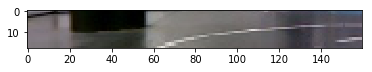

In [150]:
images.shape, plt.imshow(images[56])

In [151]:
#convert labels to np.array
labels = np.array(labels)
labels_val = np.array(labels_val)

In [152]:
#convert datas to dummyvalues
labelsd = pd.get_dummies(labels)

In [153]:
labelsd.shape, labelsd

((323, 2),      0  1
 0    0  1
 1    0  1
 2    0  1
 3    0  1
 4    0  1
 5    0  1
 6    0  1
 7    0  1
 8    0  1
 9    0  1
 10   0  1
 11   0  1
 12   0  1
 13   0  1
 14   0  1
 15   0  1
 16   0  1
 17   0  1
 18   0  1
 19   0  1
 20   0  1
 21   0  1
 22   0  1
 23   0  1
 24   0  1
 25   0  1
 26   0  1
 27   0  1
 28   0  1
 29   0  1
 ..  .. ..
 293  1  0
 294  1  0
 295  1  0
 296  1  0
 297  1  0
 298  1  0
 299  1  0
 300  1  0
 301  1  0
 302  1  0
 303  1  0
 304  1  0
 305  1  0
 306  1  0
 307  1  0
 308  1  0
 309  1  0
 310  1  0
 311  1  0
 312  1  0
 313  1  0
 314  1  0
 315  1  0
 316  1  0
 317  1  0
 318  1  0
 319  1  0
 320  1  0
 321  1  0
 322  1  0
 
 [323 rows x 2 columns])

In [158]:
#convert to np.array again
labelsd = np.array(labelsd)

In [159]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [160]:
K.clear_session()

img_in = Input(shape=(18, 160, 3), name='img_in')

x = img_in

x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

flat = Flatten()(x)

x = Dense(20)(flat)
x = Activation('relu')(x)

#categorical output
out = Dense(2, activation='softmax')(x)

model = Model(inputs=[img_in], outputs=[out])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [161]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 18, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 160, 1)        28        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 80, 1)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 80, 2)          20        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 40, 2)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 40, 2)          38        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 20, 2)          0         
__________

In [163]:
h = model.fit(images, labelsd, batch_size=1, epochs=20, verbose=1)

Epoch 1/20
323/323 [==============================] - 1s - loss: 0.0544 - acc: 0.9814     
Epoch 2/20
323/323 [==============================] - 1s - loss: 0.0459 - acc: 0.9876     
Epoch 3/20
323/323 [==============================] - 1s - loss: 0.0592 - acc: 0.9721     
Epoch 4/20
323/323 [==============================] - 1s - loss: 0.0430 - acc: 0.9876     
Epoch 5/20
323/323 [==============================] - 1s - loss: 0.0256 - acc: 0.9938     
Epoch 6/20
323/323 [==============================] - 1s - loss: 0.0168 - acc: 0.9969     
Epoch 7/20
323/323 [==============================] - 1s - loss: 0.1056 - acc: 0.9628     
Epoch 8/20
323/323 [==============================] - 1s - loss: 0.0344 - acc: 0.9876     
Epoch 9/20
323/323 [==============================] - 1s - loss: 0.0412 - acc: 0.9845     
Epoch 10/20
323/323 [==============================] - 1s - loss: 0.0380 - acc: 0.9907     
Epoch 11/20
323/323 [==============================] - 1s - loss: 0.0135 - acc: 1.0000   

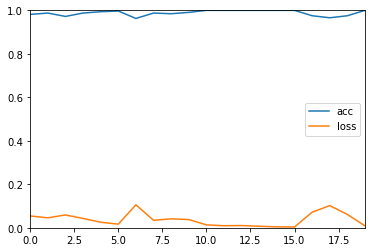

In [164]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [168]:
# Get predictions
all_preds = np.argmax(model.predict(images_val), axis=1)

all_preds, labels_val

(array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [169]:
import math
i = 0
res = 0
for value in idx:
    if value != labels_val[i]:
        res = res + 1
    i = i + 1
res/i

0.3235294117647059

In [84]:
model.save('model-anticipation.h5')

In [ ]:
from keras.models import load_model
model = load_model('test_model.h5')